# **Decision Tree CART**
CART (Classification and Regression Tree) decision tree is a classification and regression algorithm based on a binary tree and is a fundamental component of random forest and boostings, which are among the most powerful machine learning algorithms today.
Trees may also be non-binary depending on the implementation. Other popular decision tree implementations include the following: ID3, C4.5, 5.0.

### **Decision Tree structure**
Decision tree consists of the following components: the root node, branches (left and right), decision and leaf (terminal) nodes. The root and decision nodes are questions with a threshold value for dividing the training set into parts (left and right), and the leaves are the final predictions: the average of the values in a case of regression and the statistical mode for classification.

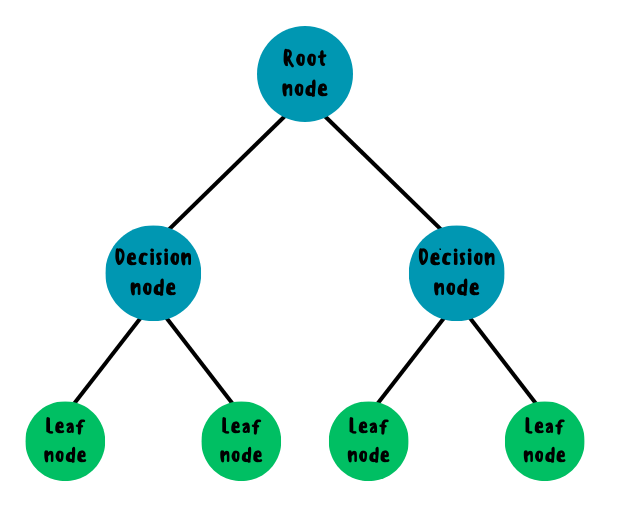

Each leaf node corresponds to a certain rectangular area on the plot of decision boundaries between two features. If neighboring plots have the same value on the plot, they are automatically combined and represented as one large area.

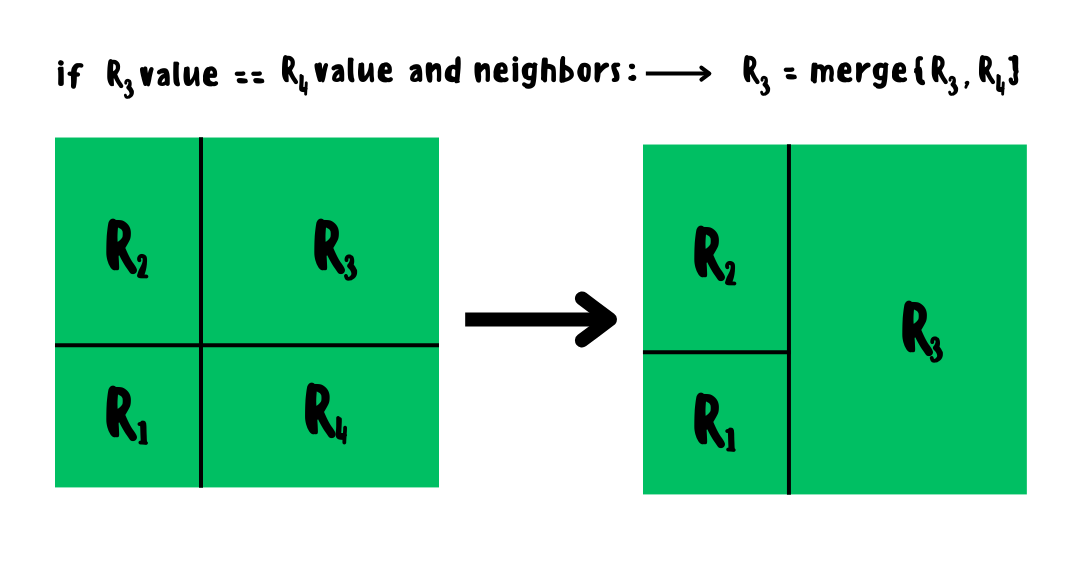

### **Choosing the best split**
Choosing the best split when building a decision node in a tree is like a game in which you need to guess a celebrity by asking questions to which you can only hear the answer "yes" or "no". It is logical that in order to quickly find the right answer, it is necessary to ask questions that will exclude the largest number of incorrect options, for example, the question about "gender" will immediately exclude half of the options, while the question about "age" will be less informative. Simply put, choosing the best question is to look for a feature whose specific meaning best separates the correct answer from the wrong ones.

An indicator of how well a question in the decision node allows you to separate the correct answer from the incorrect ones is called a measure of node impurity. In the case of classification, the following criteria are used to assess the quality of node splittig:

- Gini impurity is a measure of diversity in the probability distribution of classes. If all  elements in the node belong to the same class, then Gini impurity is 0, and in the case of a uniform distribution of classes in the node, the Gini impurity is 0.5.

$G_{i} = 1 - \sum\limits_{k = 1}^{n} P_{i,k}^{2} \ - \ $ Gini impurity of i$^{th}$ node

- Shannon entropy is a measure of the uncertainty or disorder of classes in a node. It characterizes the amount of information needed to describe the state of the system: the higher the entropy value, the less ordered the system is and vice versa.

$S_{i} = - \sum\limits_{k = 1}^{n} P_{i,k} \ log_{2}P_{i,k} \ - \ $ Shannon's entropy

- Missclassification error rate is a value that displays the proportion of incorrectly classified elements in a node: the lower this value, the less impurity in the node.

$E_{i} = 1 - max\ P_{i,k} \ - \ $ missclassification error rate

$P_{i, k} \ - \ $proportion of k$^{th}$ class samples among the training samples in the i$^{th}$ node.

In practice, Gini impurity and Shannon's entropy are most often used due to their greater informativeness. As can be seen from the plot for the case of binary classification (where P+ is the probability of belonging to the "+" class), the plot of doubled Gini impurity is very similar to the plot of Shannon's entropy: in the first case, slightly less balanced trees will be obtained, however, when working with large datasets, Gini impurity is more preferable due to lower computational complexity.

**Code for plot visualization**

<ipython-input-1-4ccecae0b17b>:10: RuntimeWarning: divide by zero encountered in log2
  return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])
<ipython-input-1-4ccecae0b17b>:10: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])


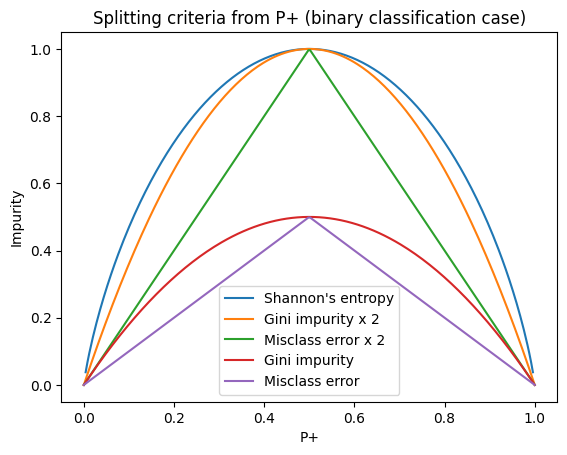

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gini(probas):
    return np.array([1- (p ** 2 + (1-p) ** 2) for p in probas])


def entropy(probas):
    return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])


def misclass_error_rate(probas):
    return np.array([1 - max([p, 1-p]) for p in probas])


probas = np.linspace(0, 1, 250)
plt.plot(probas, entropy(probas), label="Shannon's entropy")
plt.plot(probas, 2 * gini(probas),  label="Gini impurity x 2")
plt.plot(probas, 2 * misclass_error_rate(probas), label="Misclass error x 2")
plt.plot(probas, gini(probas), label="Gini impurity")
plt.plot(probas, misclass_error_rate(probas), label="Misclass error")
plt.title("Splitting criteria from P+ (binary classification case)")
plt.xlabel("P+")
plt.ylabel("Impurity")
plt.legend();

In the case of regression, MSE is most often used to assess the quality of node splitting, but Friedman MSE and MAE can also be used.

### **Loss function**
So how does the selection of the best split ultimately happen? After selecting one of the criteria for evaluating the quality of node splitting (for example, Gini impurity or MSE), their threshold values are taken for all unique attribute values, sorted in ascending order and presented as the arithmetic mean between neighboring values. Next, the training set is divided into 2 subsets (nodes): everything less than or equal to the current threshold value goes to the left subset, and everything greater than that goes to the right. For the obtained subsets, impurities are calculated based on the selected criterion, after which their weighted sum is presented as a loss function, the value of which will correspond to the threshold value of the feature. The threshold with the lowest value of the loss function in the training set (subset) will be the best split.

The loss functions will have the following form:

$J(k, t_{k}) = \frac{N_{m}^{left}}{N_{m}} G_{left} +
\frac{N_{m}^{right}}{N_{m}} G_{right} \ - \ $ cost function for classification

$J(k, t_{k}) = \frac{N_{m}^{left}}{N_{m}} MSE_{left} +
\frac{N_{m}^{right}}{N_{m}} MSE_{right} \ - \ $ cost function for regression

$J(k, t_{k}) \to min$

In the case of entropy, a slightly different approach is used: the so—called information gain is calculated as the difference in the entropies of the parent and child nodes. The threshold with the maximum information gain in the training set/subset will correspond to the best partition:

$IG(Q) = S_{parent} - (\frac{N_{m}^{left}}{N_{m}} S_{child}^{left} +
\frac{N_{m}^{right}}{N_{m}} S_{child}^{right}) \to max \ - \ $ information gain

$Q \ -\  $ question(condition) for splitting of subset $m$

For clarity, consider the following example. Let's say we have 4 cats and 4 dogs, and we also know some of their visual features: "height", "ears" (hanging and pointed erect) and "whiskers" (presence or absence). How is the root node for classifying dogs and cats built in the decision tree? Very simple: First, for each feature, the animals are divided into 2 groups according to the question, after which Gini impurity is calculated for each of the groups. The threshold value of the feature with the lowest value of the loss function (weighted sum of impurities) will be used to split the root (decision) node. In this case, the feature "height" has the least impurity and the question in the decision node will look like "height ⩽ 20 cm". It is worth adding that in the case of categorical features, their binarization occurs and the questions look like this: "ears ⩽ 0.5", "mustache ⩽ 0.5". When categorical features can take more than 2 values, other types of encoding are used, such as label or one-hot encoding.

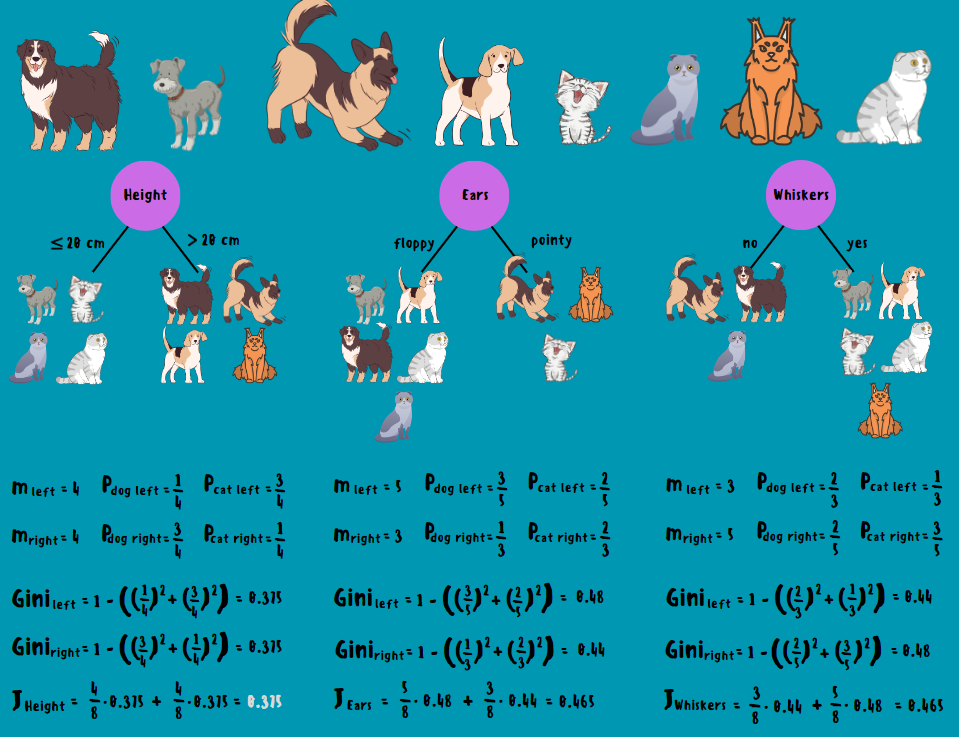

### **The principle of operation of Decision Tree (CART)**
The algorithm is constructed as follows:
- 1) a root node is created based on the best split;
- 2) the training set is divided into 2 subsets: everything that meets the splitting condition is sent to the left node, the rest to the right node;
- 3) next, steps 1-2 are repeated recursively for each training subset until one of the main stopping criteria is reached: maximum depth, maximum number of leaves, minimum number of observations in a leaf, or minimum impurity reduction in a node.

### **Decision tree regularization**
A tree structure grown without limits will be more or less prone to overfitting and 2 approaches are used to solve this problem: *pre-pruning* (limiting the growth of the tree during construction by any of the stop criteria) and *post-pruning* (cutting off unnecessary branches after complete construction). The second approach is more delicate because it allows you to get an asymmetric and more accurate tree structure, leaving only the most informative decision nodes.

There are 2 types of post-punishing:
- **Top-down pruning** is a method in which checking and pruning the least informative branches starts from the root node. This method has a relatively low computational complexity, however, as in the case of pre-pruning, its main disadvantage is also the possibility of underfitting by removing branches that could potentially contain informative nodes. The most famous types of this pruning include the following:
 - *Pessimistic Error Pruning (PEP)*, when branches with the highest expected error are pruned, the threshold of which is set in advance;
 - *Critical Value Pruning (CVP)*, when branches are pruned whose informativeness is less than a certain critical value.

- **Bottom-up pruning** is a method in which checking and pruning the least informative branches begins with the leaves. In this case, more accurate trees are obtained due to a complete bottom-up traversal and evaluation of each decision node, however, this leads to an increase in computational complexity. The most popular types of this pruning are the following:
 - *Minimum Error Pruning (MEP)*, when the tree with the least expected error is searched on a deferred selection;
 - *Reduced Error Pruning (REP)* when decision nodes are deleted until the accuracy measured on the deferred sample drops;
 - *Cost-complexity pruning (CCP)*, when a series of subtrees is built by removing the weakest nodes in each of them using a coefficient calculated as the difference between the error of the root node of the subtree and the total error of its leaves, and the choice of the best subtree is made on a test set or using k-fold cross-validation.

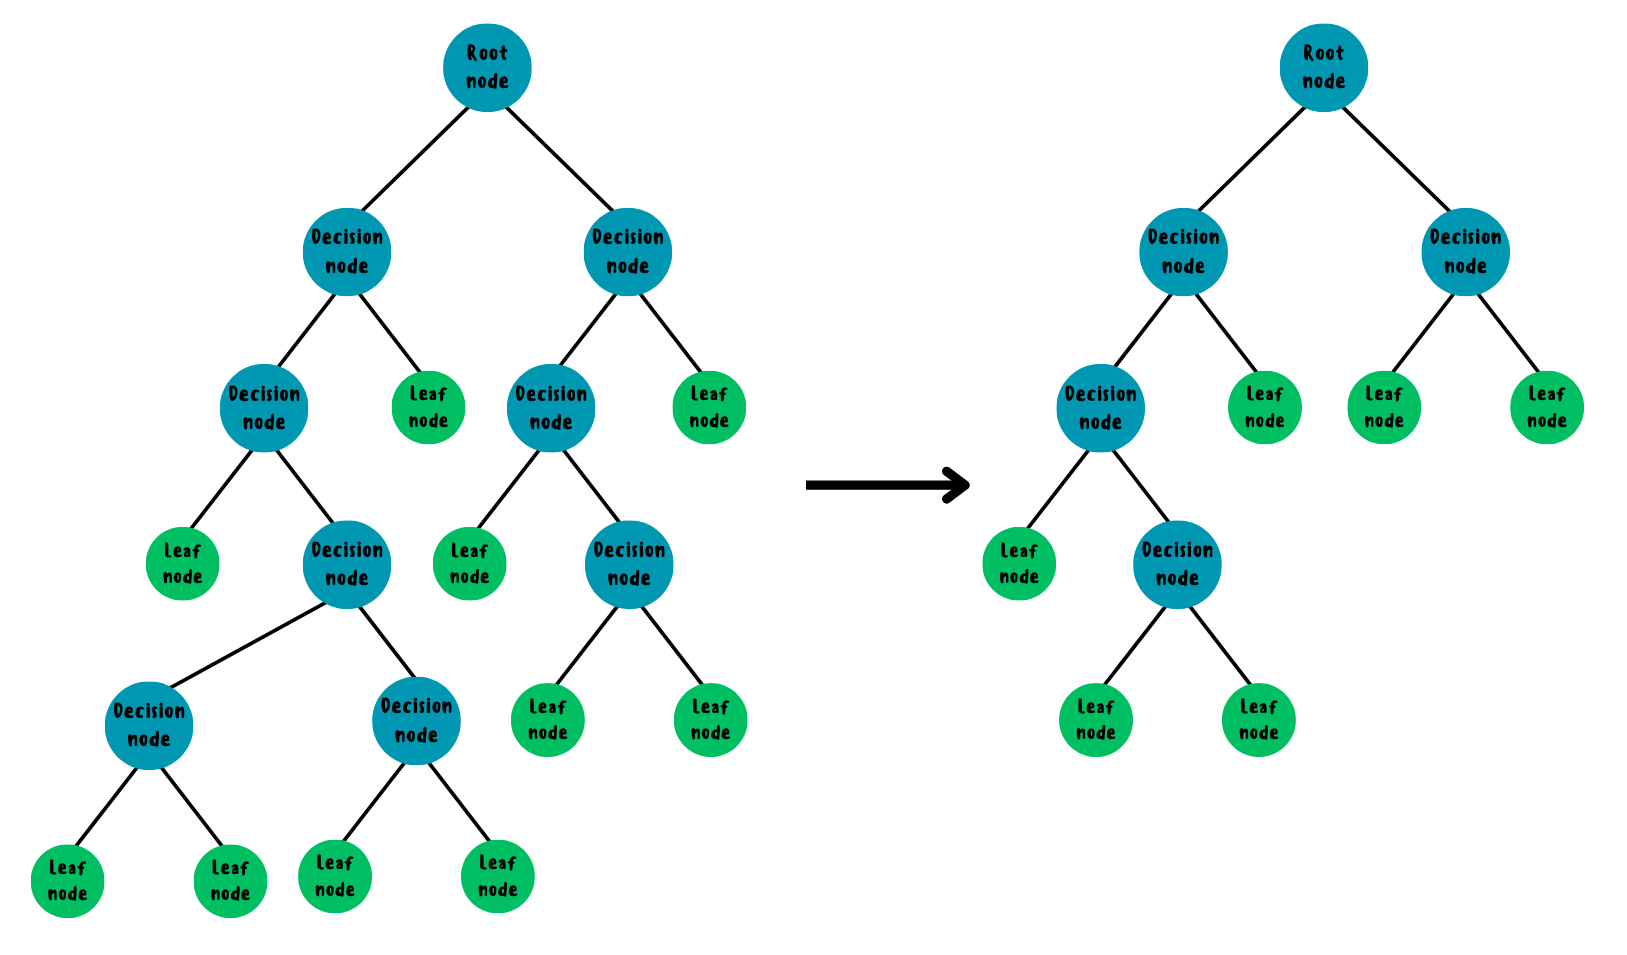

### **Minimal cost-complexity pruning**
The scikit-learn implementation for decision trees uses a modification of cost-complexity pruning, which works as follows:
- 1) first, a full-grown tree is built without limits;
- 2) next, for absolutely all nodes in the tree, the error is calculated based on weighted Gini impurity in the case of classification or weighted MSE in the case of regression;
- 3) for each subtree in the tree, the cumulative error of its leaves is calculated;
- 4) for each subtree in the tree, the alpha coefficient is calculated, represented as the difference between the error of the root node of the subtree and the cumulative error of its leaves;
- 5) the subtree with the smallest $\alpha_{ccp}$ is deleted and becomes a leaf node, and the coefficient itself is stored in the cost_complety_pruning_path array and corresponds to the new pruned tree;
- 6) Steps 2-5 are repeated recursively for each subtree until the pruning reaches the root node.

If you set a certain value $\alpha_{ccp}$ initially, then this coefficient will be applied to each subtree and as a result the subtree with the smallest error among all the subtrees will remain, and the choice of the best $\alpha_{ccp}$ from cost_complety_pruning_path to obtain the most accurate subtree is made on a test set or using a k-fold cross-validation.

**Formulas for calculations**

$R_\alpha(T) = R(T) + \alpha|\widetilde{T}| \ - \ $ regularization

$\alpha_{ccp} = \frac{R_{t} - R(T_{t})}{|T| - 1} \ - \ $ effective ccp alpha

$R_{node} = \frac{N_{m}}{N} G_{m} \ - \ $ decision ($R_{t}$) or a leaf node $R(T)$ error rate
for classification

$R_{node} = \frac{N_{m}}{N} MSE_{m} \ - \ $ decision ($R_{t}$) or a leaf node $R(T)$ error rate
for regression

$R(T_{t}) = \sum\limits_{i=1}^{n} R(T_{i})\ - \ $ total leaf error rate of a tree/subtree

$T \ - \ $  number of terminal (leaf) nodes

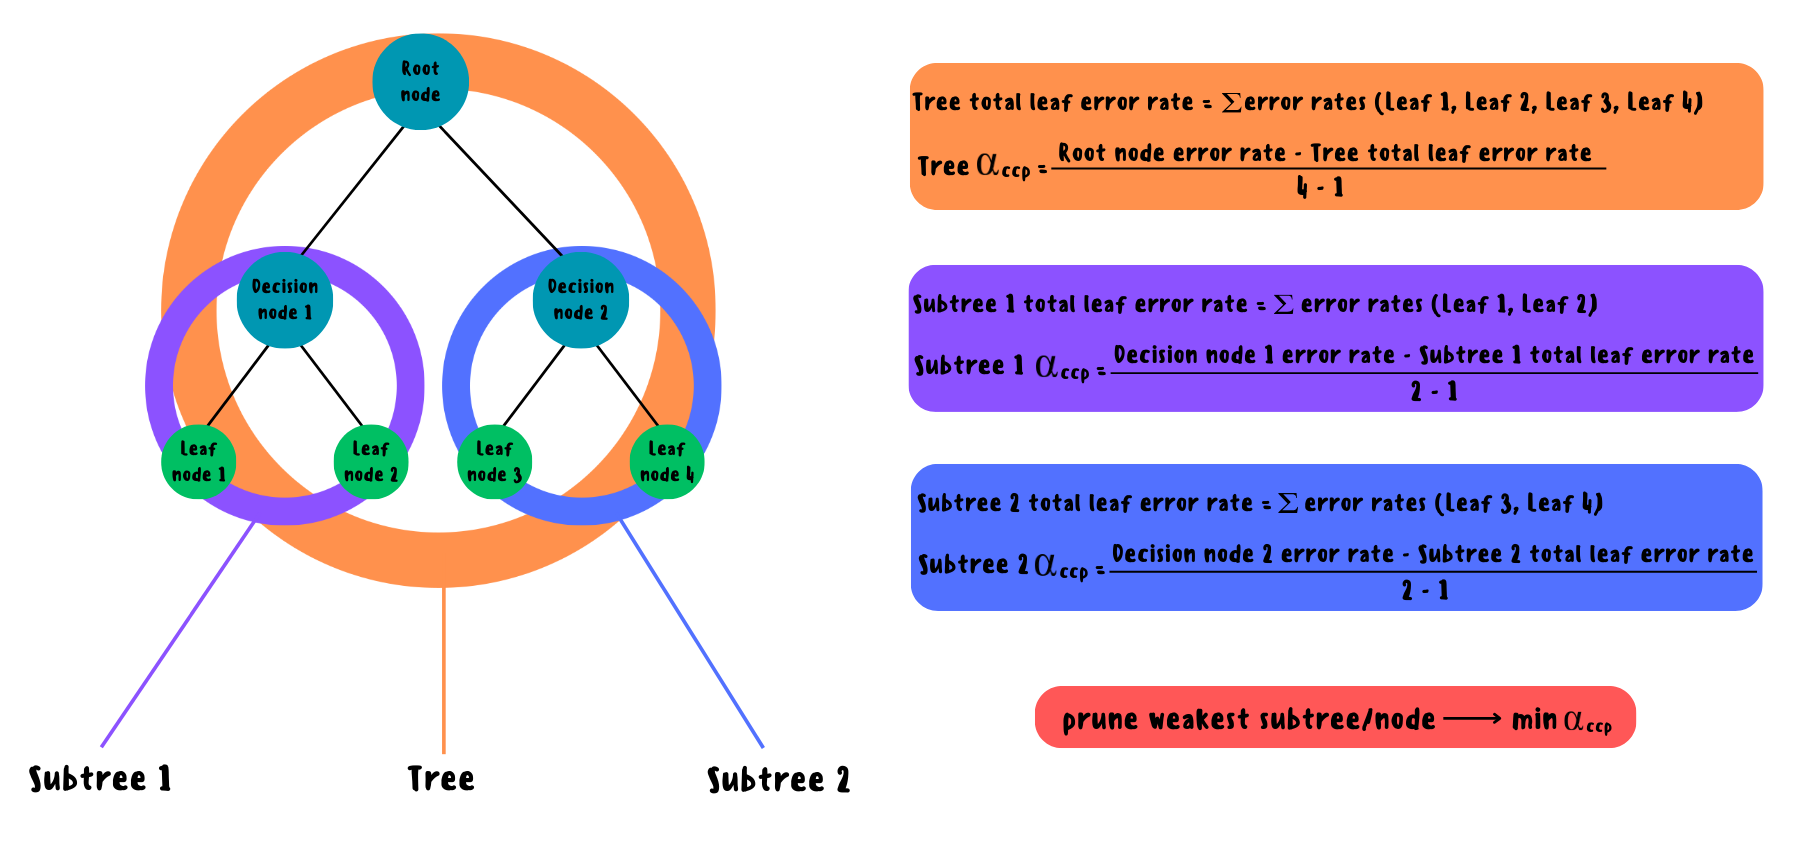

### **Python implementation from scratch**
In the original tree, a separate class is used to create nodes and store information in them, but in this case the tree and all information about the nodes are stored in a dictionary with keys in lowercase format. This change is used to be able to output the resulting tree and compare it with the implementation of scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from mlxtend.plotting import plot_decision_regions
from copy import deepcopy
from pprint import pprint

In [3]:
class DecisionTreeCART:

    def __init__(self, max_depth=100, min_samples=2, ccp_alpha=0.0, regression=False):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.ccp_alpha = ccp_alpha
        self.regression = regression
        self.tree = None
        self._y_type = None
        self._num_all_samples = None

    def _set_df_type(self, X, y, dtype):
        X = X.astype(dtype)
        y = y.astype(dtype) if self.regression else y
        self._y_dtype = y.dtype

        return X, y

    @staticmethod
    def _purity(y):
        unique_classes = np.unique(y)

        return unique_classes.size == 1

    @staticmethod
    def _is_leaf_node(node):
        return not isinstance(node, dict)   # if a node/tree is a leaf

    def _leaf_node(self, y):
        class_index = 0

        return np.mean(y) if self.regression else y.mode()[class_index]

    def _split_df(self, X, y, feature, threshold):
        feature_values = X[feature]
        left_indexes = X[feature_values <= threshold].index
        right_indexes = X[feature_values > threshold].index
        sizes = np.array([left_indexes.size, right_indexes.size])

        return self._leaf_node(y) if any(sizes == 0) else left_indexes, right_indexes

    @staticmethod
    def _gini_impurity(y):
        _, counts_classes = np.unique(y, return_counts=True)
        squared_probabilities = np.square(counts_classes / y.size)
        gini_impurity = 1 - sum(squared_probabilities)

        return gini_impurity

    @staticmethod
    def _mse(y):
        mse = np.mean((y - y.mean()) ** 2)

        return mse

    @staticmethod
    def _cost_function(left_df, right_df, method):
        total_df_size = left_df.size + right_df.size
        p_left_df = left_df.size / total_df_size
        p_right_df = right_df.size / total_df_size
        J_left = method(left_df)
        J_right = method(right_df)
        J = p_left_df*J_left + p_right_df*J_right

        return J  # weighted Gini impurity or weighted mse (depends on a method)

    def _node_error_rate(self, y, method):
        if self._num_all_samples is None:
            self._num_all_samples = y.size   # num samples of all dataframe
        current_num_samples = y.size

        return current_num_samples / self._num_all_samples * method(y)

    def _best_split(self, X, y):
        features = X.columns
        min_cost_function = np.inf
        best_feature, best_threshold = None, None
        method = self._mse if self.regression else self._gini_impurity

        for feature in features:
            unique_feature_values = np.unique(X[feature])

            for i in range(1, len(unique_feature_values)):
                current_value = unique_feature_values[i]
                previous_value = unique_feature_values[i-1]
                threshold = (current_value + previous_value) / 2
                left_indexes, right_indexes = self._split_df(X, y, feature, threshold)
                left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]
                current_J = self._cost_function(left_labels, right_labels, method)

                if current_J <= min_cost_function:
                    min_cost_function = current_J
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _stopping_conditions(self, y, depth, n_samples):
        return self._purity(y), depth == self.max_depth, n_samples < self.min_samples

    def _grow_tree(self, X, y, depth=0):
        current_num_samples = y.size
        X, y = self._set_df_type(X, y, np.float128)
        method = self._mse if self.regression else self._gini_impurity

        if any(self._stopping_conditions(y, depth, current_num_samples)):
            RTi = self._node_error_rate(y, method)   # leaf node error rate
            leaf_node = f'{self._leaf_node(y)} | error_rate {RTi}'
            return leaf_node

        Rt = self._node_error_rate(y, method)   # decision node error rate
        best_feature, best_threshold = self._best_split(X, y)
        decision_node = f'{best_feature} <= {best_threshold} | ' \
                        f'as_leaf {self._leaf_node(y)} error_rate {Rt}'

        left_indexes, right_indexes = self._split_df(X, y, best_feature, best_threshold)
        left_X, right_X = X.loc[left_indexes], X.loc[right_indexes]
        left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]

        # recursive part
        tree = {decision_node: []}
        left_subtree = self._grow_tree(left_X, left_labels, depth+1)
        right_subtree = self._grow_tree(right_X, right_labels, depth+1)

        if left_subtree == right_subtree:
            tree = left_subtree
        else:
            tree[decision_node].extend([left_subtree, right_subtree])

        return tree

    def _tree_error_rate_info(self, tree, error_rates_list):
        if self._is_leaf_node(tree):
            *_, leaf_error_rate = tree.split()
            error_rates_list.append(np.float128(leaf_error_rate))
        else:
            decision_node = next(iter(tree))
            left_subtree, right_subtree = tree[decision_node]
            self._tree_error_rate_info(left_subtree, error_rates_list)
            self._tree_error_rate_info(right_subtree, error_rates_list)

        RT = sum(error_rates_list)   # total leaf error rate of a tree
        num_leaf_nodes = len(error_rates_list)

        return RT, num_leaf_nodes

    @staticmethod
    def _ccp_alpha_eff(decision_node_Rt, leaf_nodes_RTt, num_leafs):

        return (decision_node_Rt - leaf_nodes_RTt) / (num_leafs - 1)

    def _find_weakest_node(self, tree, weakest_node_info):
        if self._is_leaf_node(tree):
            return tree

        decision_node = next(iter(tree))
        left_subtree, right_subtree = tree[decision_node]
        *_, decision_node_error_rate = decision_node.split()

        Rt = np.float128(decision_node_error_rate)
        RTt, num_leaf_nodes = self._tree_error_rate_info(tree, [])
        ccp_alpha = self._ccp_alpha_eff(Rt, RTt, num_leaf_nodes)
        decision_node_index, min_ccp_alpha_index = 0, 1

        if ccp_alpha <= weakest_node_info[min_ccp_alpha_index]:
            weakest_node_info[decision_node_index] = decision_node
            weakest_node_info[min_ccp_alpha_index] = ccp_alpha

        self._find_weakest_node(left_subtree, weakest_node_info)
        self._find_weakest_node(right_subtree, weakest_node_info)

        return weakest_node_info

    def _prune_tree(self, tree, weakest_node):
        if self._is_leaf_node(tree):
            return tree

        decision_node = next(iter(tree))
        left_subtree, right_subtree = tree[decision_node]
        left_subtree_index, right_subtree_index = 0, 1
        _, leaf_node = weakest_node.split('as_leaf ')

        if weakest_node is decision_node:
            tree = weakest_node
        if weakest_node in left_subtree:
            tree[decision_node][left_subtree_index] = leaf_node
        if weakest_node in right_subtree:
            tree[decision_node][right_subtree_index] = leaf_node

        self._prune_tree(left_subtree, weakest_node)
        self._prune_tree(right_subtree, weakest_node)

        return tree

    def cost_complexity_pruning_path(self, X: pd.DataFrame, y: pd.Series):
        tree = self._grow_tree(X, y)   # grow a full tree
        tree_error_rate, _ = self._tree_error_rate_info(tree, [])
        error_rates = [tree_error_rate]
        ccp_alpha_list = [0.0]

        while not self._is_leaf_node(tree):
            initial_node = [None, np.inf]
            weakest_node, ccp_alpha = self._find_weakest_node(tree, initial_node)
            tree = self._prune_tree(tree, weakest_node)
            tree_error_rate, _ = self._tree_error_rate_info(tree, [])

            error_rates.append(tree_error_rate)
            ccp_alpha_list.append(ccp_alpha)

        return np.array(ccp_alpha_list), np.array(error_rates)

    def _ccp_tree_error_rate(self, tree_error_rate, num_leaf_nodes):

        return tree_error_rate + self.ccp_alpha*num_leaf_nodes   # regularization

    def _optimal_tree(self, X, y):
        tree = self._grow_tree(X, y)   # grow a full tree
        min_RT_alpha, final_tree = np.inf, None

        while not self._is_leaf_node(tree):
            RT, num_leaf_nodes = self._tree_error_rate_info(tree, [])
            current_RT_alpha = self._ccp_tree_error_rate(RT, num_leaf_nodes)

            if current_RT_alpha <= min_RT_alpha:
                min_RT_alpha = current_RT_alpha
                final_tree = deepcopy(tree)

            initial_node = [None, np.inf]
            weakest_node, _ = self._find_weakest_node(tree, initial_node)
            tree = self._prune_tree(tree, weakest_node)

        return final_tree

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.tree = self._optimal_tree(X, y)

    def _traverse_tree(self, sample, tree):
        if self._is_leaf_node(tree):
            leaf, *_ = tree.split()
            return leaf

        decision_node = next(iter(tree))  # dict key
        left_node, right_node = tree[decision_node]
        feature, other = decision_node.split(' <=')
        threshold, *_ = other.split()
        feature_value = sample[feature]

        if np.float128(feature_value) <= np.float128(threshold):
            next_node = self._traverse_tree(sample, left_node)    # left_node
        else:
            next_node = self._traverse_tree(sample, right_node)   # right_node

        return next_node

    def predict(self, samples: pd.DataFrame):
        # apply traverse_tree method for each row in a dataframe
        results = samples.apply(self._traverse_tree, args=(self.tree,), axis=1)

        return np.array(results.astype(self._y_dtype))

### **Plots for results visualization**

In [4]:
def tree_plot(sklearn_tree, Xa_train):
    plt.figure(figsize=(12, 18))  # customize according to the size of your tree
    plot_tree(sklearn_tree, feature_names=Xa_train.columns, filled=True, precision=6)
    plt.show()


def tree_scores_plot(estimator, ccp_alphas, train_data, test_data, metric, labels):
    train_scores, test_scores = [], []
    X_train, y_train = train_data
    X_test, y_test = test_data
    x_label, y_label = labels

    for ccp_alpha_i in ccp_alphas:
        estimator.ccp_alpha = ccp_alpha_i
        estimator.fit(X_train, y_train)
        train_pred_res = estimator.predict(X_train)
        test_pred_res = estimator.predict(X_test)

        train_score = metric(y_train, train_pred_res)
        test_score = metric(y_test, test_pred_res)
        train_scores.append(train_score)
        test_scores.append(test_score)

    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f"{y_label} vs {x_label} for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
    ax.legend()
    plt.show()


def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    if y.dtype != 'int':
        y = pd.Series(LabelEncoder().fit_transform(y))
        y_train = pd.Series(LabelEncoder().fit_transform(y_train))

    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train.values[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train.values)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

### **Uploading datasets**
[Iris dataset](https://www.kaggle.com/datasets/himanshunakrani/iris-dataset) will be used to train models, where it is necessary to correctly determine the types of flowers based on their characteristics. In the case of regression, the load_linneryd dataset from scikit-learn is used.

In [5]:
df_path = "/content/drive/MyDrive/iris.csv"
iris = pd.read_csv(df_path)
X1, y1 = iris.iloc[:, :-1], iris.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [6]:
X2, y2 = load_linnerud(return_X_y=True, as_frame=True)
y2 = y2['Pulse']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
print(X2, y2, sep='\n')

    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0
0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64


### **Models training and evaluation of the obtained results**
In the case of classification, the tree based on the iris data showed high accuracy. After pruning, the accuracy did not increase, but it was possible to find a more optimal tree (alpha=0.0143) with the same accuracy and fewer nodes.

But in the case of regression, we managed to get an increase in accuracy by selecting alpha=3.613, which creates a tree with minimal error on the test set. All the results are shown below.

**Classification before pruning**

{'petal_width <= 0.75 | as_leaf virginica error_rate 0.6643083900226757': ['setosa | error_rate 0.0',
                                                                           {'petal_length <= 4.95 | as_leaf virginica error_rate 0.33480885311871234': [{'petal_width <= 1.65 | as_leaf versicolor error_rate 0.0521008403361345': ['versicolor '
                                                                                                                                                                                                                                    '| '
                                                                                                                                                                                                                                    'error_rate '
                                                                                                                                                                                     

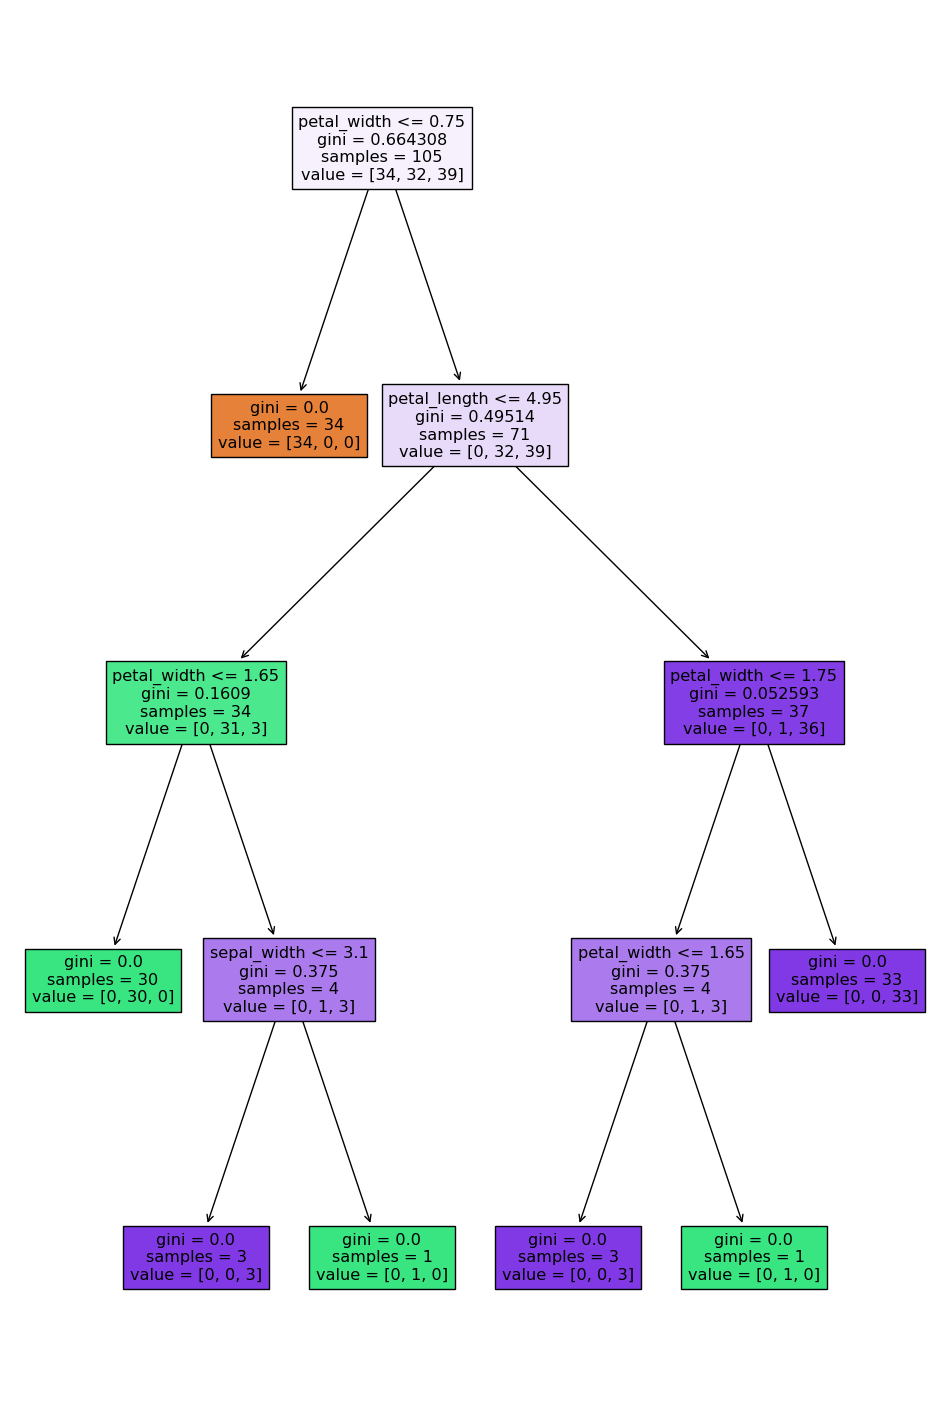

tree alphas: [0.         0.00926641 0.01428571 0.03781513 0.26417519]
sklearn alphas: [0.         0.00926641 0.01428571 0.03781513 0.26417519]


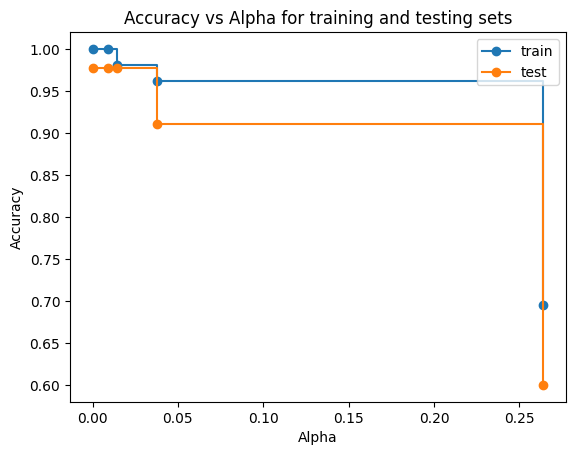

In [7]:
tree_classifier = DecisionTreeCART()
tree_classifier.fit(X1_train, y1_train)
clf_ccp_alphas, _ = tree_classifier.cost_complexity_pruning_path(X1_train, y1_train)
clf_ccp_alphas = clf_ccp_alphas[:-1]

sk_tree_classifier = DecisionTreeClassifier(random_state=0)
sk_tree_classifier.fit(X1_train, y1_train)
sk_clf_path = sk_tree_classifier.cost_complexity_pruning_path(X1_train, y1_train)
sk_clf_ccp_alphas = sk_clf_path.ccp_alphas[:-1]

sk_clf_estimator = DecisionTreeClassifier(random_state=0)
train1_data, test1_data = [X1_train, y1_train], [X1_test, y1_test]
metric = accuracy_score
labels = ['Alpha', 'Accuracy']

pprint(tree_classifier.tree, width=180)
tree_plot(sk_tree_classifier, X1_train)
print(f'tree alphas: {clf_ccp_alphas}', f'sklearn alphas: {sk_clf_ccp_alphas}', sep='\n')
tree_scores_plot(sk_clf_estimator, clf_ccp_alphas, train1_data, test1_data, metric, labels)

**Classification after pruning**

tree prediction
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']
 
sklearn prediction
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versi

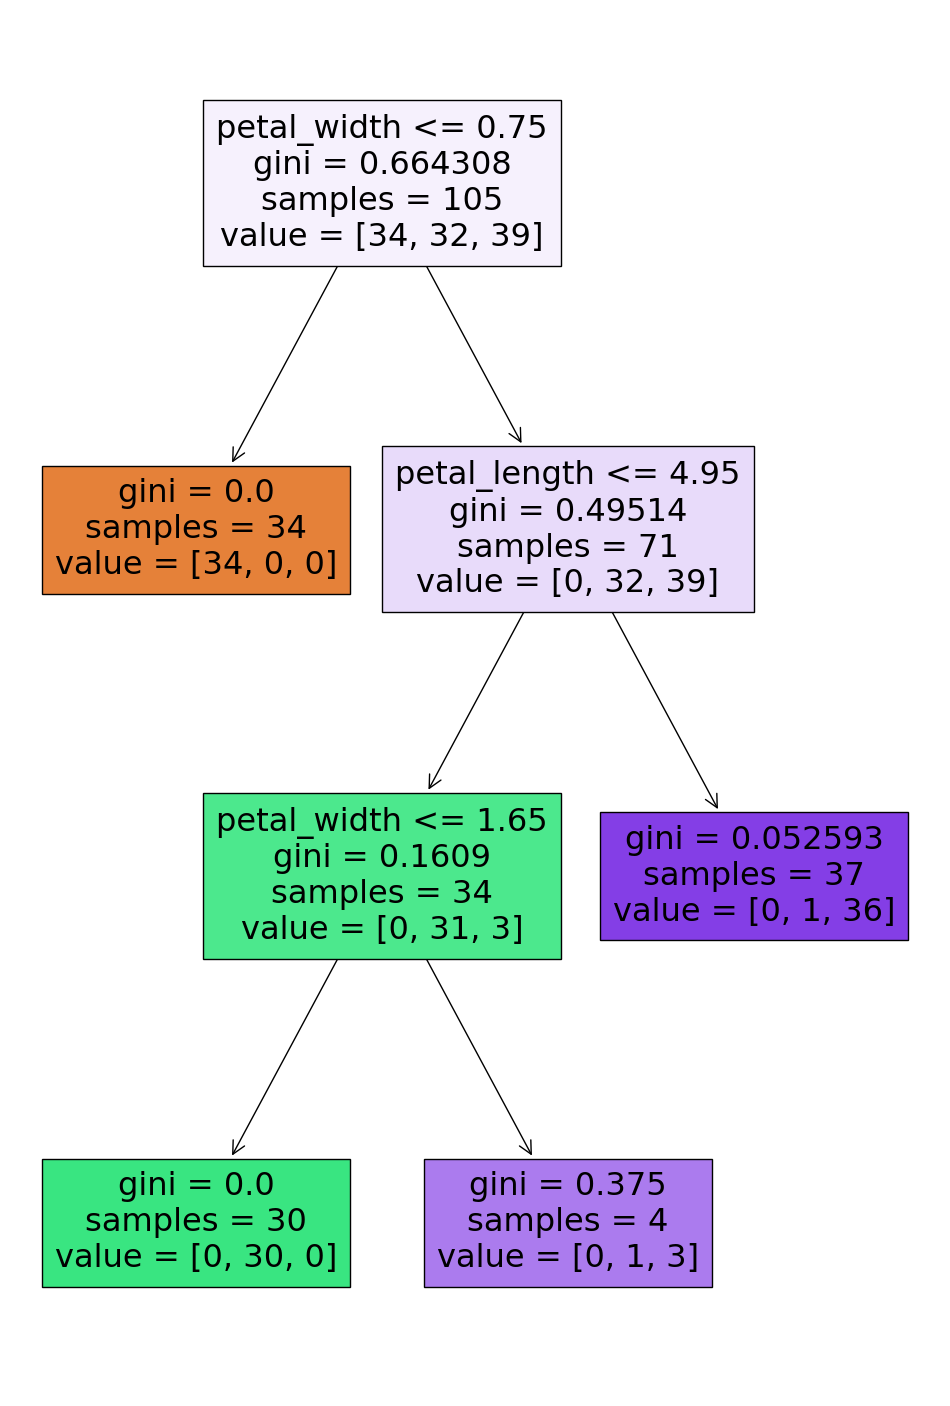

our tree pruning accuracy: before 0.9777777777777777 -> after 0.9777777777777777
sklearn tree pruning accuracy: before 0.9777777777777777 -> after 0.9777777777777777


In [8]:
tree_clf_prediction = tree_classifier.predict(X1_test)
tree_clf_accuracy = accuracy_score(y1_test, tree_clf_prediction)
sk_tree_clf_prediction = sk_tree_classifier.predict(X1_test)
sk_clf_accuracy = accuracy_score(y1_test, sk_tree_clf_prediction)

best_clf_ccp_alpha = 0.0143 # based on a plot
best_tree_classifier = DecisionTreeCART(ccp_alpha=best_clf_ccp_alpha)
best_tree_classifier.fit(X1_train, y1_train)
best_tree_clf_prediction = best_tree_classifier.predict(X1_test)
best_tree_clf_accuracy = accuracy_score(y1_test, best_tree_clf_prediction)

best_sk_tree_classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=best_clf_ccp_alpha)
best_sk_tree_classifier.fit(X1_train, y1_train)
best_sk_tree_clf_prediction = best_sk_tree_classifier.predict(X1_test)
best_sk_clf_accuracy = accuracy_score(y1_test, best_sk_tree_clf_prediction)

print('tree prediction', tree_clf_prediction, ' ', sep='\n')
print('sklearn prediction', sk_tree_clf_prediction, ' ', sep='\n')
print('best tree prediction', best_tree_clf_prediction, ' ', sep='\n')
print('best sklearn prediction', best_sk_tree_clf_prediction, ' ', sep='\n')

pprint(best_tree_classifier.tree, width=180)
tree_plot(best_sk_tree_classifier, X1_train)
print(f'our tree pruning accuracy: before {tree_clf_accuracy} -> after {best_tree_clf_accuracy}')
print(f'sklearn tree pruning accuracy: before {sk_clf_accuracy} -> after {best_sk_clf_accuracy}')

**Pruning at different ccp alpha**

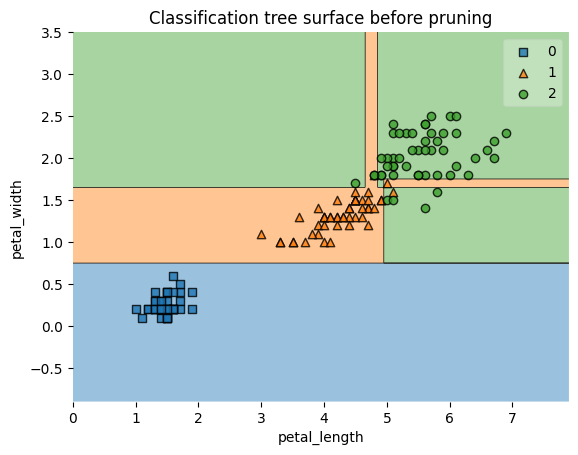

In [9]:
feature_indexes = [2, 3]
title1 = 'Classification tree surface before pruning'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_tree_classifier, feature_indexes, title1)

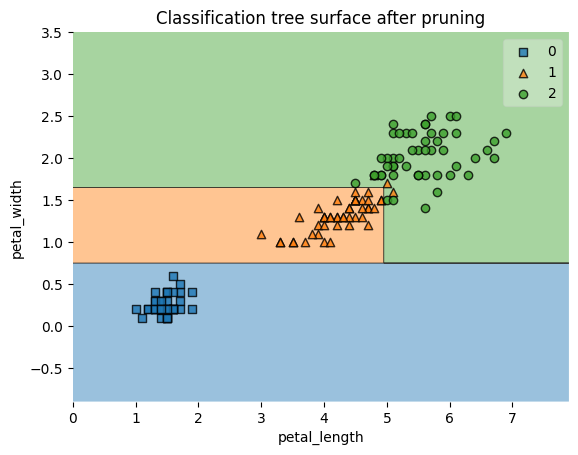

In [10]:
feature_indexes = [2, 3]
title2 = 'Classification tree surface after pruning'
decision_boundary_plot(X1, y1, X1_train, y1_train, best_sk_tree_classifier, feature_indexes, title2)

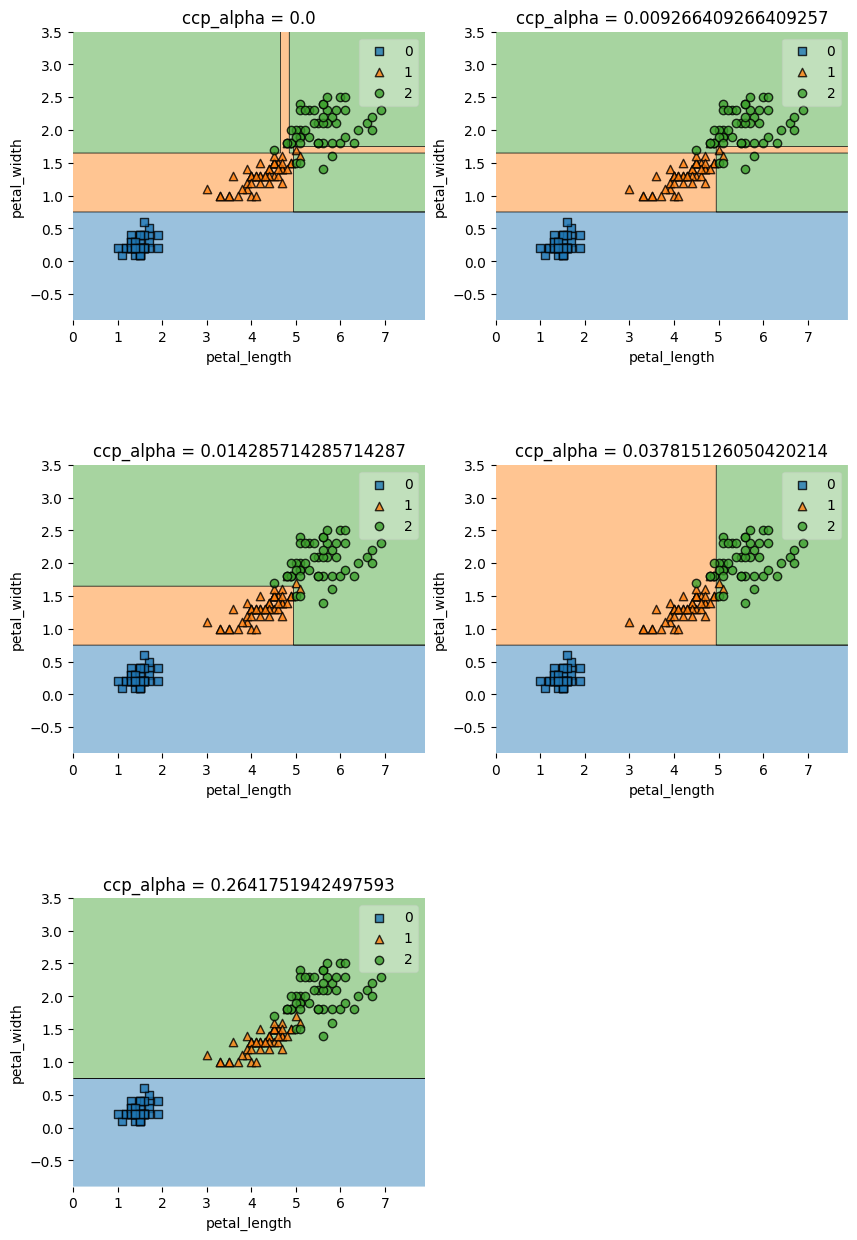

In [11]:
feature_indexes = [2, 3]
plt.figure(figsize=(10, 15))

for i, alpha in enumerate(clf_ccp_alphas):
    sk_tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(hspace=0.5)
    title = f'ccp_alpha = {alpha}'
    decision_boundary_plot(X1, y1, X1_train, y1_train, sk_tree_clf, feature_indexes, title)

**Regression before pruning**

{'Jumps <= 90.5 | as_leaf 54.625 error_rate 29.359375': [{'Jumps <= 46.0 | as_leaf 52.90909090909091 error_rate 17.181818181818183': [{'Jumps <= 34.0 | as_leaf 54.857142857142854 error_rate 11.428571428571429': [{'Jumps <= 28.0 | as_leaf 50.0 error_rate 2.0': ['54.0 '
                                                                                                                                                                                                                                                                     '| '
                                                                                                                                                                                                                                                                     'error_rate '
                                                                                                                                                                                              

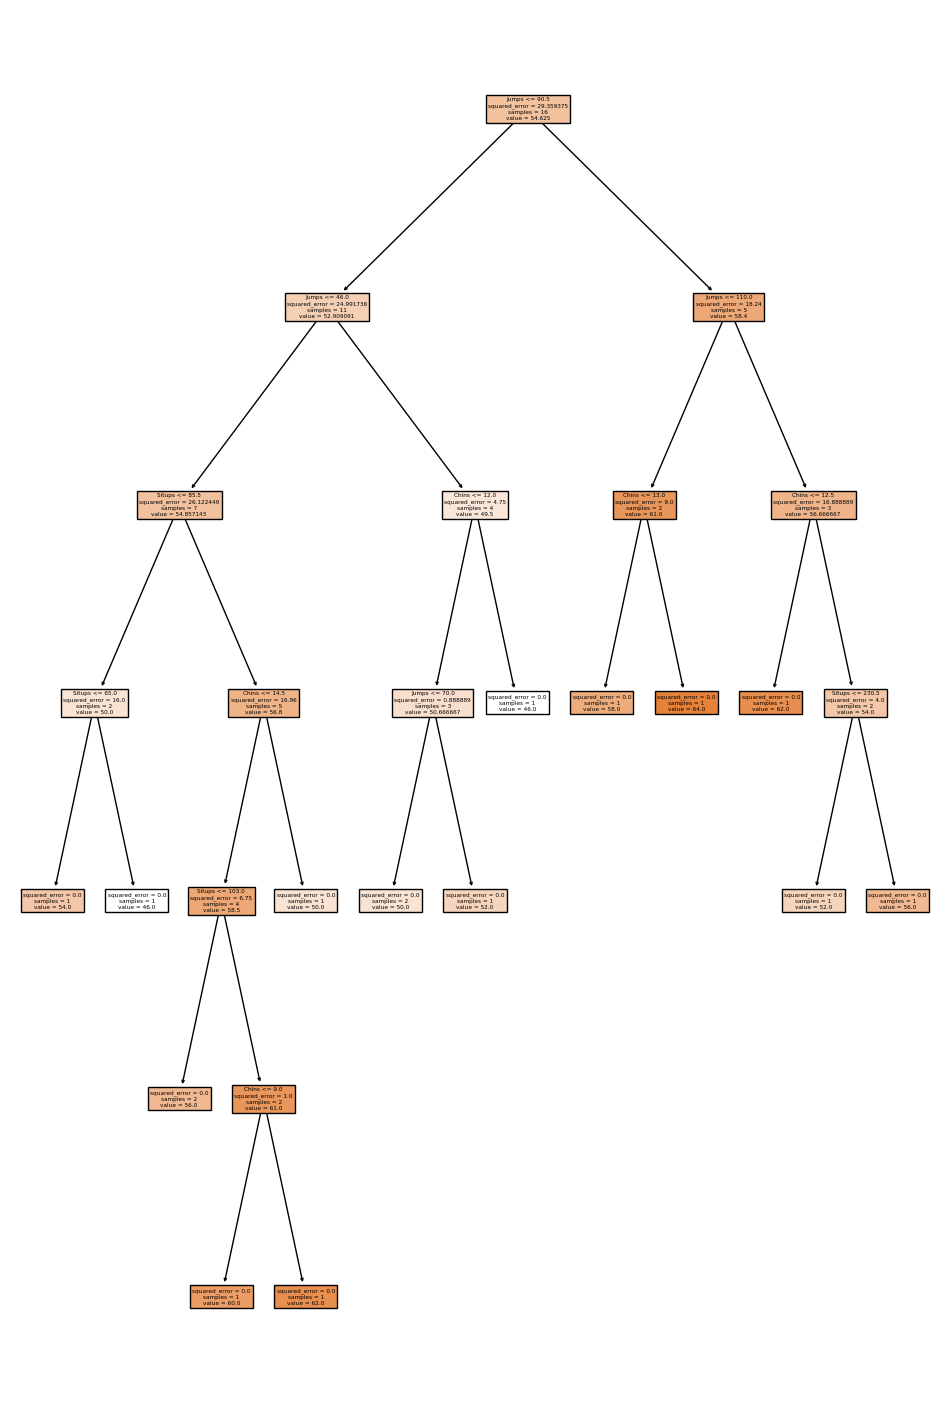

CART alphas: [0.         0.125      0.16666667 0.5        1.02083333 1.125
 1.5625     2.         2.0375     3.6125     4.12857143 4.56574675]


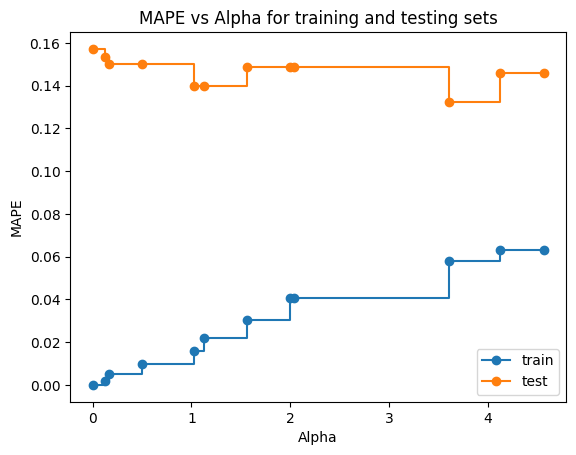

sklearn_alphas: [0.         0.125      0.16666667 0.5        1.02083333 1.125
 1.5625     2.         2.0375     3.6125     4.12857143 4.56574675]


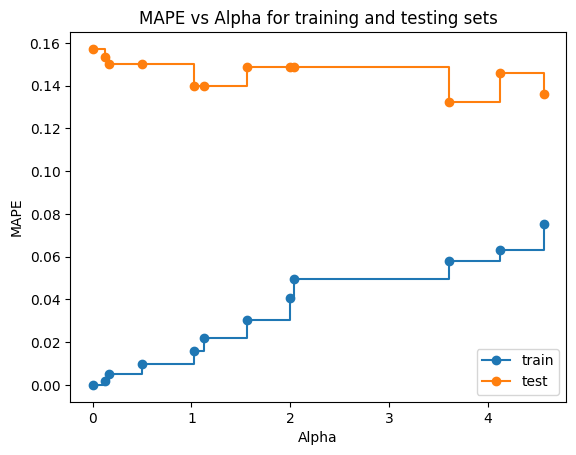

In [12]:
tree_regressor = DecisionTreeCART(regression=True)
tree_regressor.fit(X2_train, y2_train)
reg_ccp_alphas, _ = tree_regressor.cost_complexity_pruning_path(X2_train, y2_train)
reg_ccp_alphas = reg_ccp_alphas[:-1]

sk_tree_regressor = DecisionTreeRegressor(random_state=0)
sk_tree_regressor.fit(X2_train, y2_train)
sk_reg_path = sk_tree_regressor.cost_complexity_pruning_path(X2_train, y2_train)
sk_reg_ccp_alphas = sk_reg_path.ccp_alphas[:-1]

reg_estimator = DecisionTreeCART(regression=True)
sk_reg_estimator = DecisionTreeRegressor(random_state=0)
train2_data, test2_data = [X2_train, y2_train], [X2_test, y2_test]
metric = mean_absolute_percentage_error
labels = ['Alpha', 'MAPE']

pprint(tree_regressor.tree)
tree_plot(sk_tree_regressor, X2_train)

print(f'CART alphas: {reg_ccp_alphas}')
tree_scores_plot(reg_estimator, reg_ccp_alphas, train2_data, test2_data, metric, labels)
print(f'sklearn_alphas: {sk_reg_ccp_alphas}')
tree_scores_plot(sk_reg_estimator, sk_reg_ccp_alphas, train2_data, test2_data, metric, labels)

**Regression after pruning**

tree prediction
[46. 50. 60. 50.]
 
sklearn prediction
[46. 50. 60. 50.]
 
best tree prediction
[49.5 49.5 56.8 56.8]
 
best sklearn prediction
[49.5 49.5 56.8 56.8]
 
{'Jumps <= 90.5 | as_leaf 54.625 error_rate 29.359375': [{'Jumps <= 46.0 | as_leaf 52.90909090909091 error_rate 17.181818181818183': [{'Jumps <= 34.0 | as_leaf 54.857142857142854 error_rate 11.428571428571429': ['50.0 '
                                                                                                                                                                                                                    'error_rate '
                                                                                                                                                                                                                    '2.0',
                                                                                                                                                                       

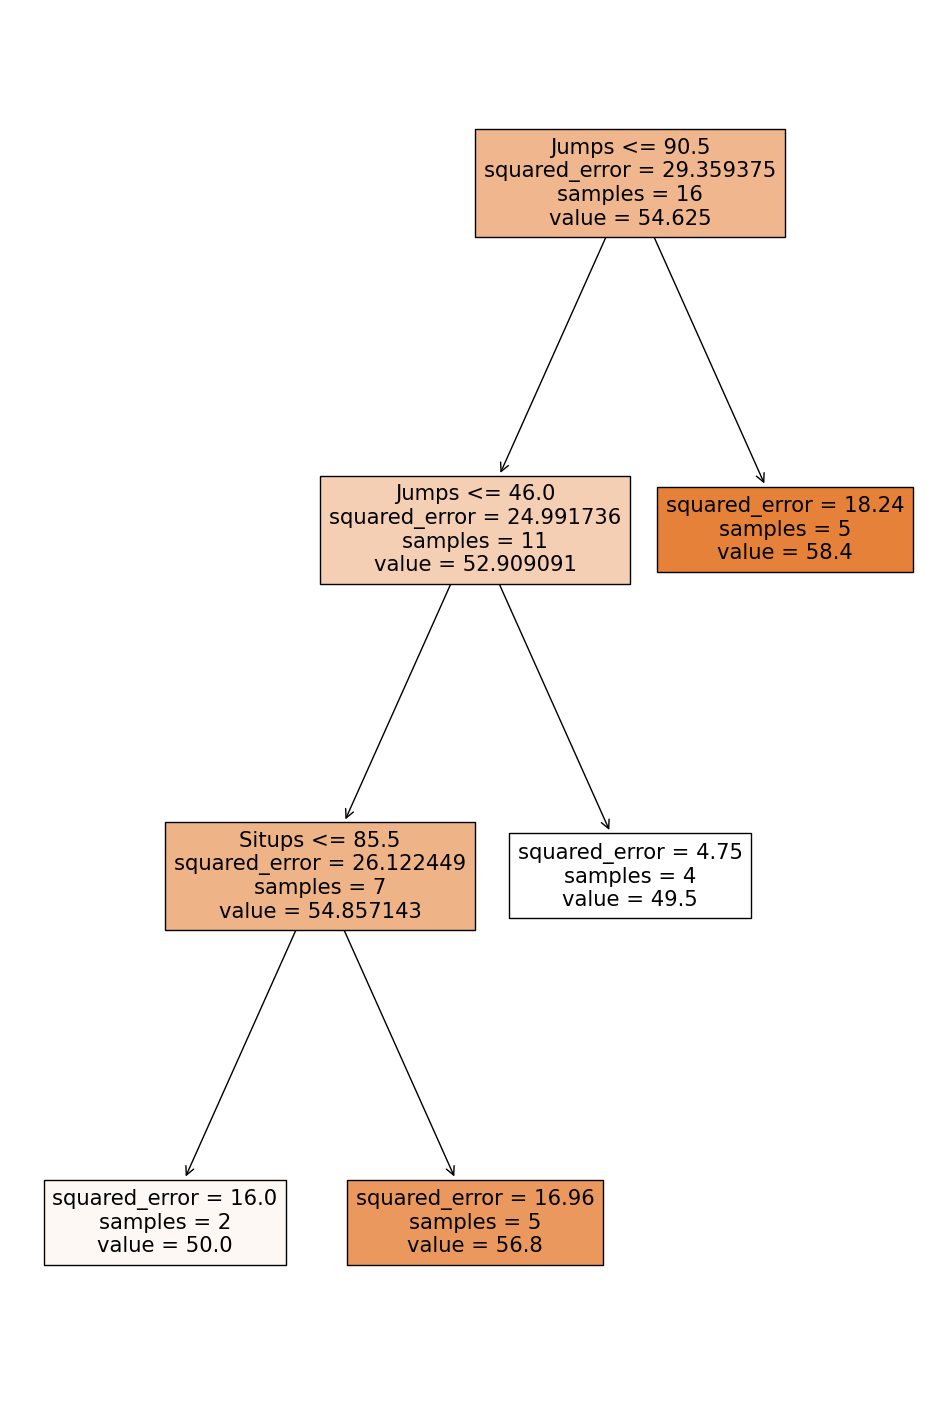

tree error: before 0.1571452674393851 -> after pruning 0.1321371427989075
sklearn tree error: before 0.1571452674393851 -> after pruning 0.13213714279890754


In [13]:
tree_reg_prediction = tree_regressor.predict(X2_test)
tree_reg_error = mean_absolute_percentage_error(y2_test, tree_reg_prediction)
sk_tree_reg_prediction = sk_tree_regressor.predict(X2_test)
sk_reg_error= mean_absolute_percentage_error(y2_test, sk_tree_reg_prediction)

best_reg_ccp_alpha = 3.613   # based on a plot
best_tree_regressor = DecisionTreeCART(ccp_alpha=best_reg_ccp_alpha, regression=True)
best_tree_regressor.fit(X2_train, y2_train)
best_tree_reg_prediction = best_tree_regressor.predict(X2_test)
lowest_tree_reg_error = mean_absolute_percentage_error(y2_test, best_tree_reg_prediction)

best_sk_tree_regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=best_reg_ccp_alpha)
best_sk_tree_regressor.fit(X2_train, y2_train)
best_sk_tree_reg_prediction = best_sk_tree_regressor.predict(X2_test)
lowest_sk_reg_error = mean_absolute_percentage_error(y2_test, best_sk_tree_reg_prediction)

print('tree prediction', tree_reg_prediction, ' ', sep='\n')
print('sklearn prediction', sk_tree_reg_prediction, ' ', sep='\n')
print('best tree prediction', best_tree_reg_prediction, ' ', sep='\n')
print('best sklearn prediction', best_sk_tree_reg_prediction, ' ', sep='\n')

pprint(best_tree_regressor.tree)
tree_plot(best_sk_tree_regressor, X2_train)
print(f'tree error: before {tree_reg_error} -> after pruning {lowest_tree_reg_error}')
print(f'sklearn tree error: before {sk_reg_error} -> after pruning {lowest_sk_reg_error}')

### **Pros and cons of a Decision Tree**

Pros:
- easy to interpret and visualize;
- good work with nonlinear data dependencies;
- no special training kit preparation is required;
- relatively high speed of training and prediction.

Cons:
- finding the optimal tree is an NP-complete task;
- instability of operation even with a small change in data;
- the possibility of overfitting due to sensitivity to noise and outliers in the data.

### **Additional sources**
Paper «The CART Decision Tree for Mining Data Streams», Leszek Rutkowskia, Maciej Jaworskia, Lena Pietruczuka, Piotr Dudaa.

Documentation:
- [CART description](https://scikit-learn.org/stable/modules/tree.html#);
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html);
- [pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html).

Lectures: [one](https://www.youtube.com/watch?v=KEprOSyrOVY), [two](https://www.youtube.com/watch?v=1I5MBdkpWgo), [three](https://www.youtube.com/watch?v=5aIFgrrTqOw;), [four](https://www.youtube.com/watch?v=5O8HvA9pMew/).

Step-by-step construction of a Decision Tree: [one](https://www.youtube.com/playlist?list=PLPOTBrypY74xS3WD0G_uzqPjCQfU6IRK-), [two](https://www.youtube.com/watch?v=_L39rN6gz7Y), [three](https://www.youtube.com/watch?v=g9c66TUylZ4).

Pruning:
- [Paper](https://www.programmersought.com/article/47967993808/).
  
- Video: [one](https://www.youtube.com/watch?v=Tg2OGohaUTc), [two](https://www.youtube.com/watch?v=D0efHEJsfHo), [three](https://www.youtube.com/watch?v=4VAOjWCHzXk).